In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

## Importamos los datos necesarios y motramos los ultimos datos de las 16 comunas

In [31]:
url          = "data.tsv"
data         = pd.read_csv(url, sep='\t')
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data.tail(16)

,date,location,new_cases,total_cases
672,2020-04-14,Arica y Parinacota,5,120
673,2020-04-14,Tarapacá,10,62
674,2020-04-14,Antofagasta,6,155
675,2020-04-14,Atacama,0,13
676,2020-04-14,Coquimbo,0,66
677,2020-04-14,Valparaíso,12,285
678,2020-04-14,Metropolitana,283,4086
679,2020-04-14,O'Higgins,5,53
680,2020-04-14,Maule,1,142
681,2020-04-14,Ñuble,4,622


## Casos de contagios por día en el pais 

In [32]:
contagiados_por_fecha = data.groupby(['date'])['new_cases'].sum()
contagiados_por_fecha

date
2020-03-03      1
2020-03-04      2
2020-03-05      1
2020-03-06      1
2020-03-07      2
2020-03-08      3
2020-03-09      3
2020-03-10      4
2020-03-11      6
2020-03-12     10
2020-03-13     10
2020-03-14     18
2020-03-15     14
2020-03-16     81
2020-03-17     45
2020-03-18     37
2020-03-19    104
2020-03-20     92
2020-03-21    103
2020-03-22     95
2020-03-23    114
2020-03-24    176
2020-03-25    220
2020-03-26    164
2020-03-27    304
2020-03-28    299
2020-03-29    230
2020-03-30    310
2020-03-31    289
2020-04-01    293
2020-04-02    373
2020-04-03    332
2020-04-04    424
2020-04-05    310
2020-04-06    344
2020-04-07    301
2020-04-08    430
2020-04-09    426
2020-04-10    529
2020-04-11    426
2020-04-12    286
2020-04-13    312
2020-04-14    392
Name: new_cases, dtype: int64

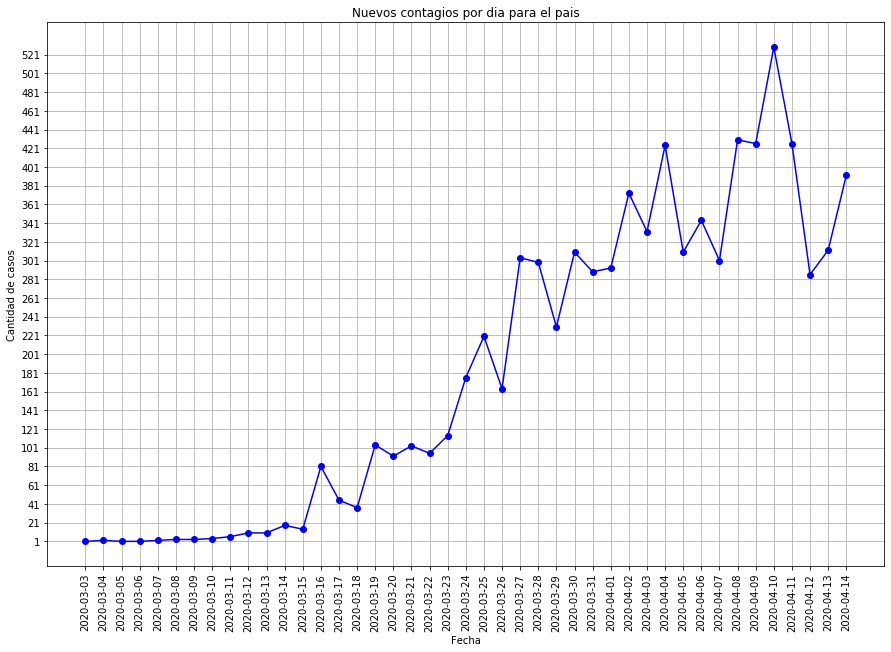

In [33]:
df_contagiados_por_fecha =  contagiados_por_fecha.to_frame().reset_index()
X                        =  df_contagiados_por_fecha["date"]
Y                        =  df_contagiados_por_fecha["new_cases"]

plt.plot(X,Y, "bo")
plt.plot(X,Y, 'b')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.title("Nuevos contagios por dia para el pais")
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(min(Y), max(Y)+1, 20))
plt.grid()
plt.show()

## Nuevos casos de contagio por región 

In [34]:
contagios_por_fecha_region = data.groupby(['date', 'location'], as_index=False)['new_cases'].sum()
contagios_por_fecha_region.tail(16)

,date,location,new_cases
672,2020-04-14,Antofagasta,6
673,2020-04-14,Araucanía,21
674,2020-04-14,Arica y Parinacota,5
675,2020-04-14,Atacama,0
676,2020-04-14,Aysén,0
677,2020-04-14,Biobío,16
678,2020-04-14,Coquimbo,0
679,2020-04-14,Los Lagos,5
680,2020-04-14,Los Ríos,10
681,2020-04-14,Magallanes,14


In [35]:
def getGraphandList(name_region, scale):
    region = contagios_por_fecha_region.loc[contagios_por_fecha_region['location'] == name_region]
    
    plt.plot(region["date"],region["new_cases"], "bo")
    plt.plot(region["date"],region["new_cases"], 'b')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de casos')
    plt.title("Curva de crecimiento - " + str(name_region))
    plt.xticks(region["date"].values, rotation='vertical')
    plt.yticks(np.arange(min(region["new_cases"].values), max(region["new_cases"].values)+1, scale))
    plt.grid()
    plt.show()


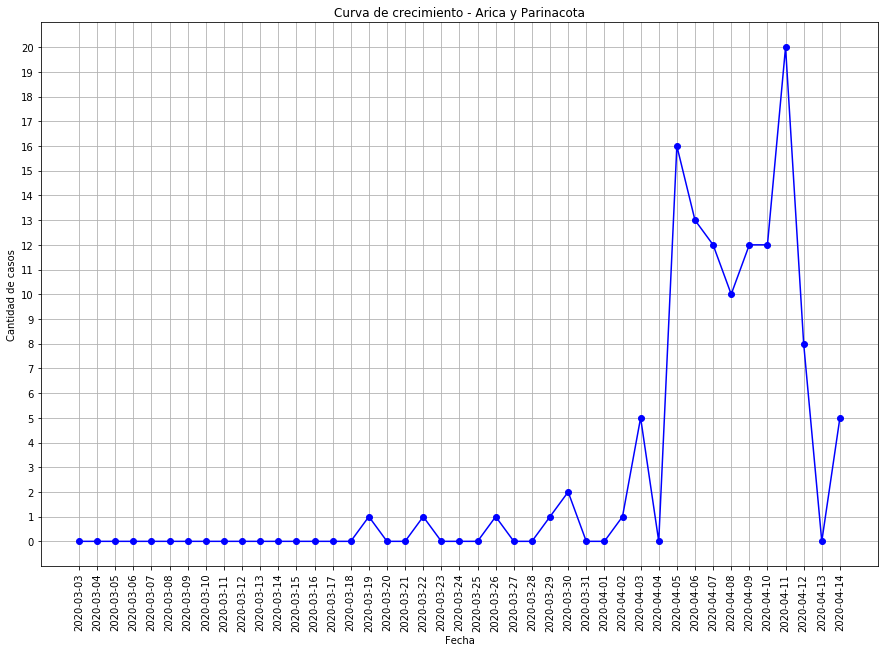

In [36]:
getGraphandList("Arica y Parinacota", 1)

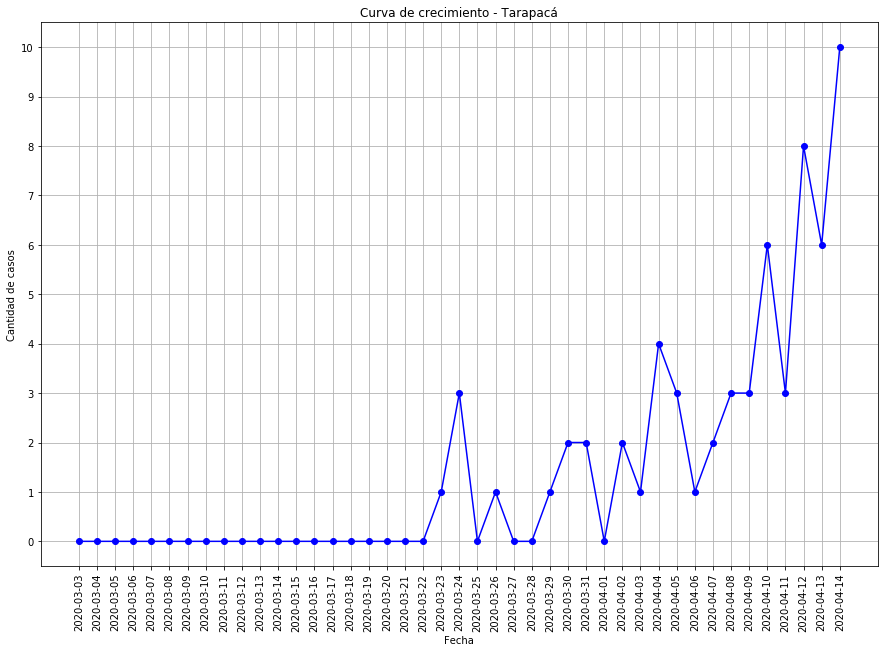

In [37]:
getGraphandList("Tarapacá", 1)

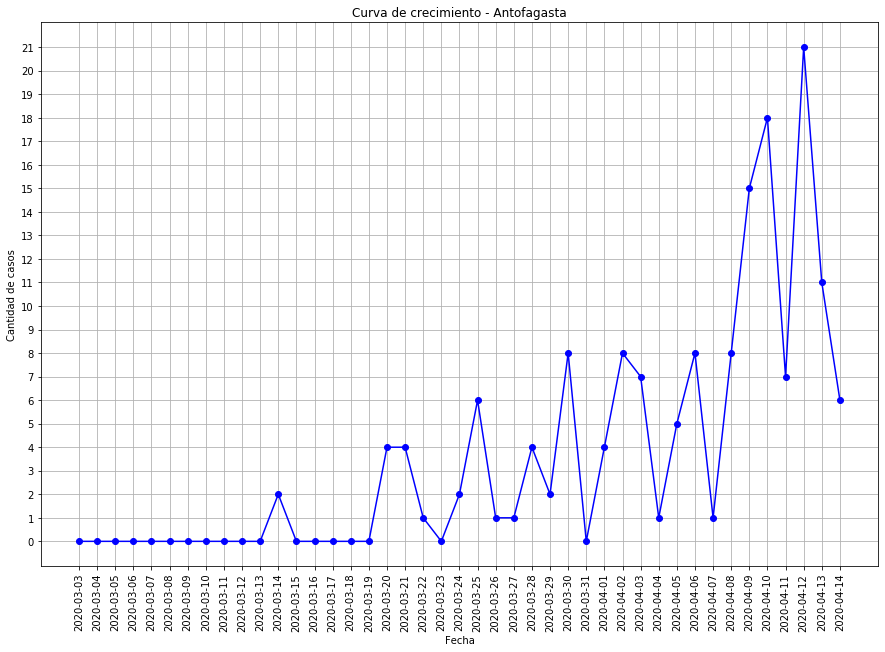

In [38]:
getGraphandList("Antofagasta", 1)

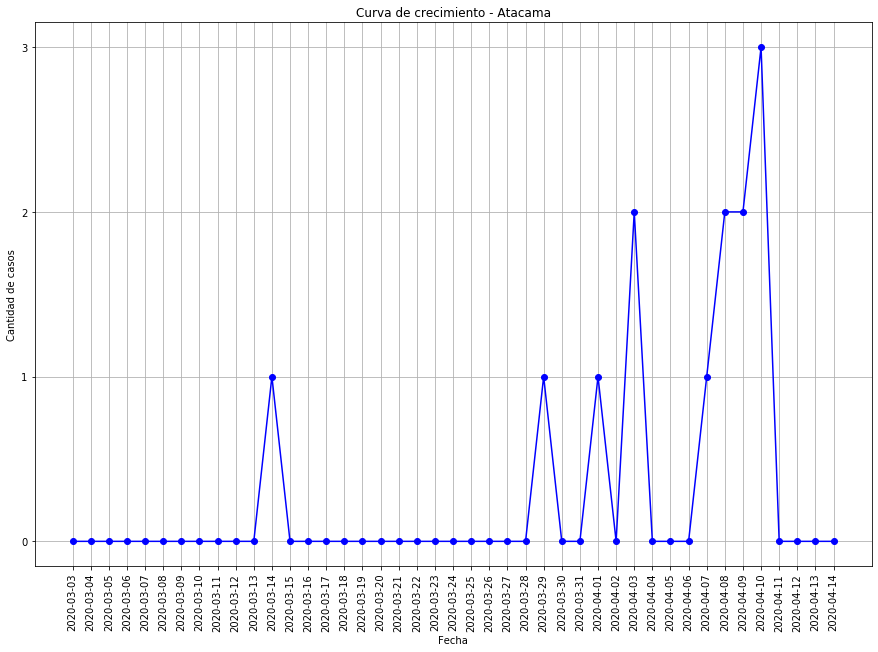

In [39]:
getGraphandList("Atacama", 1)

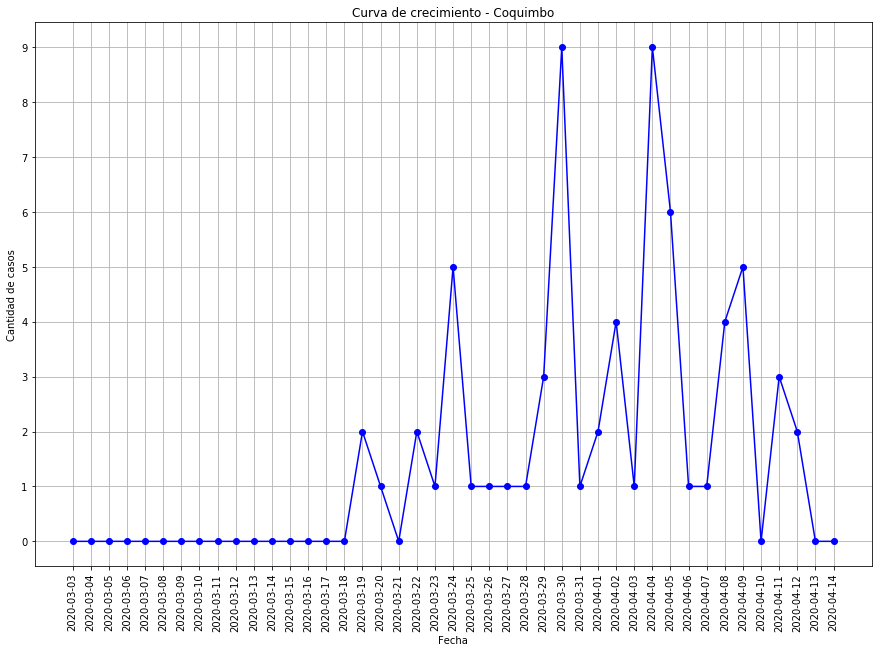

In [40]:
getGraphandList("Coquimbo", 1)

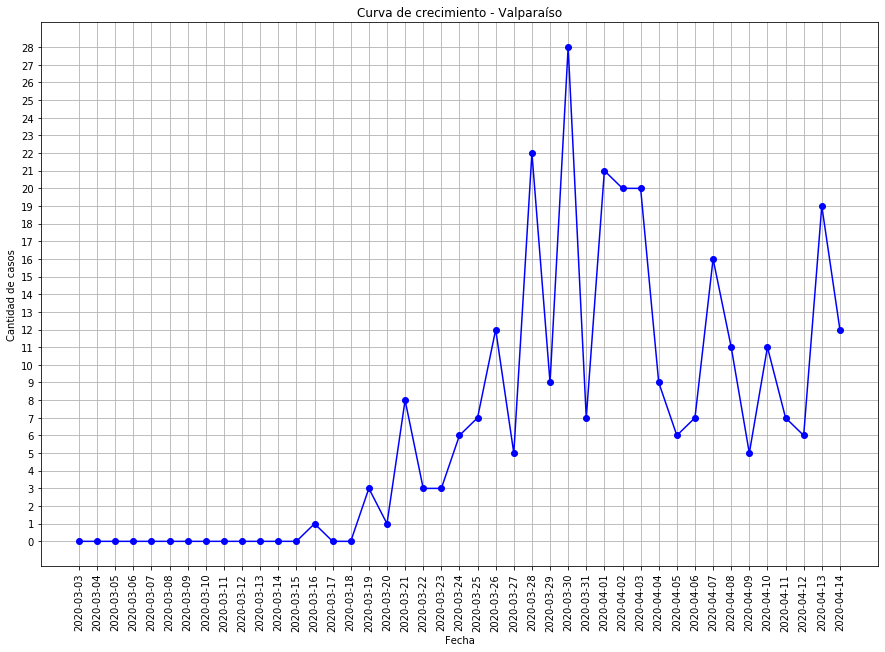

In [41]:
getGraphandList("Valparaíso", 1)

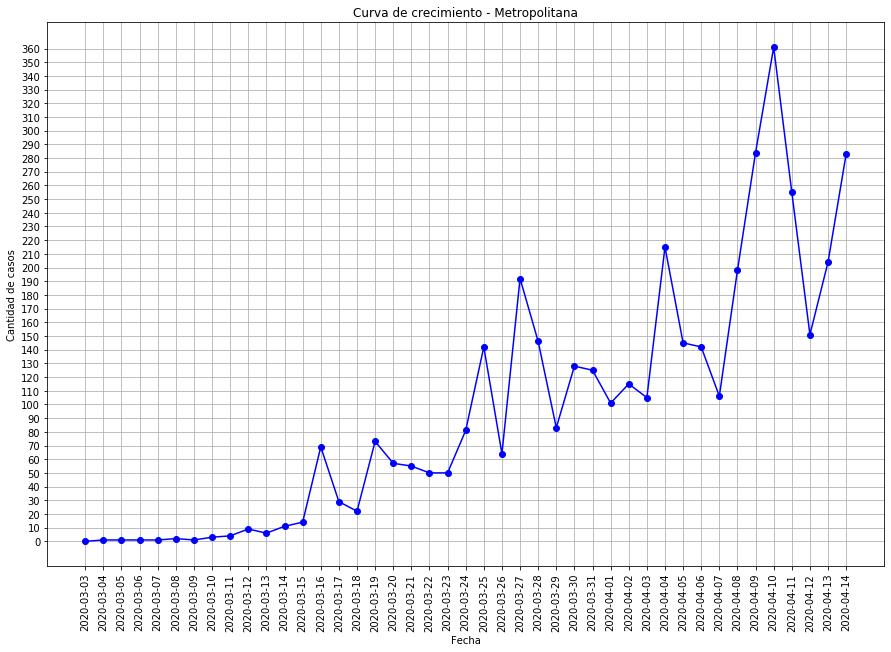

In [42]:
getGraphandList("Metropolitana", 10)

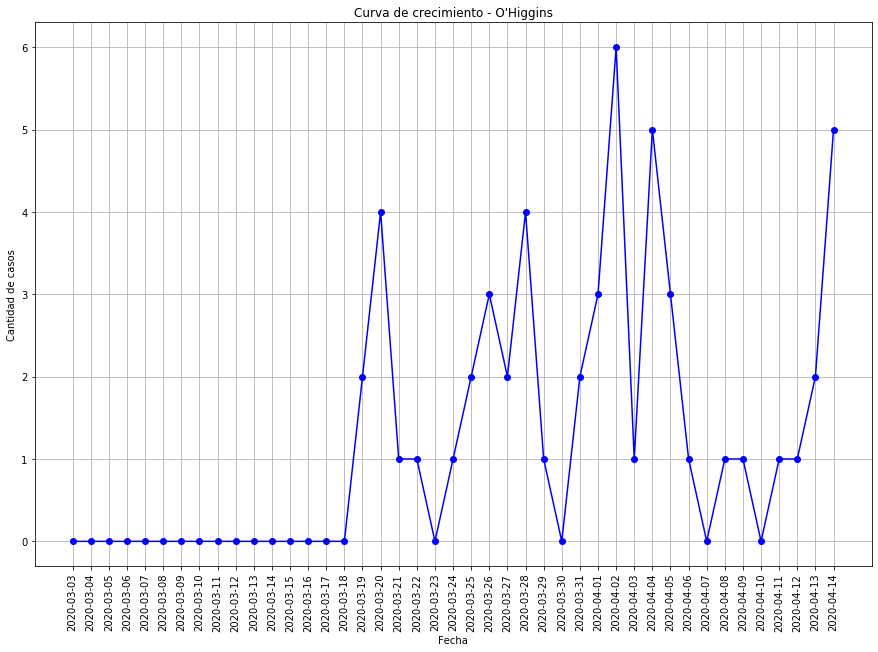

In [43]:
getGraphandList("O'Higgins", 1)

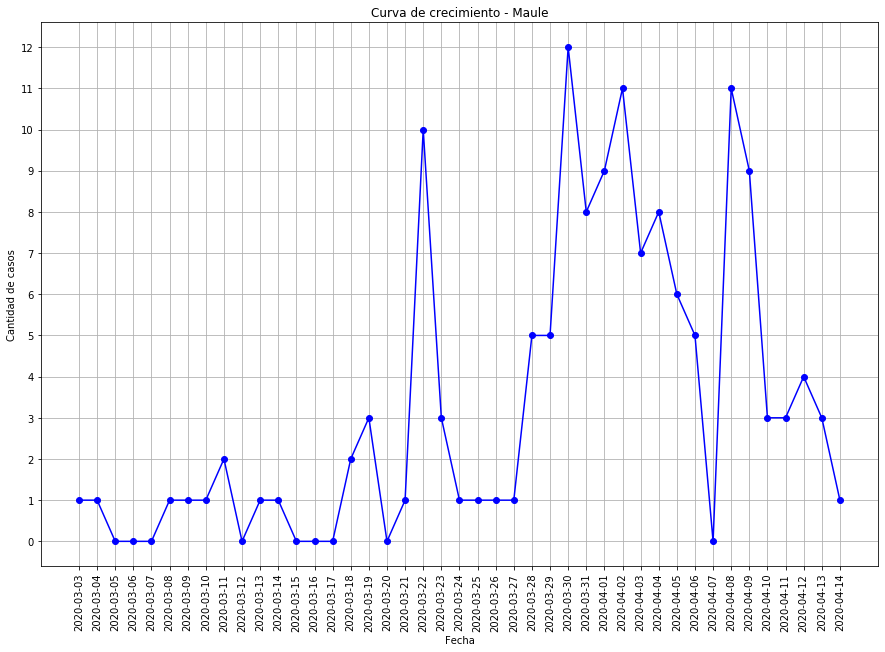

In [44]:
getGraphandList("Maule", 1)

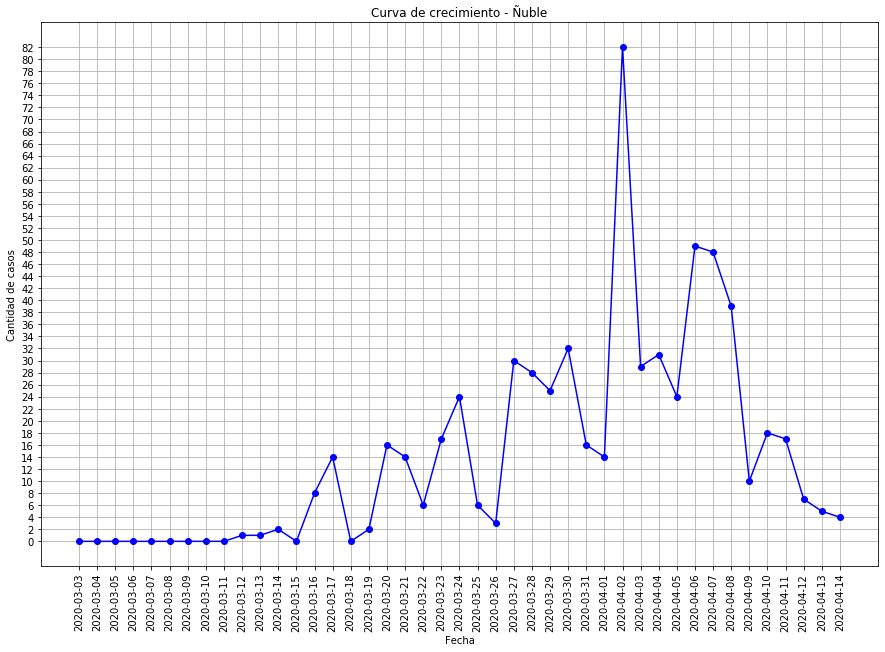

In [45]:
getGraphandList("Ñuble", 2)

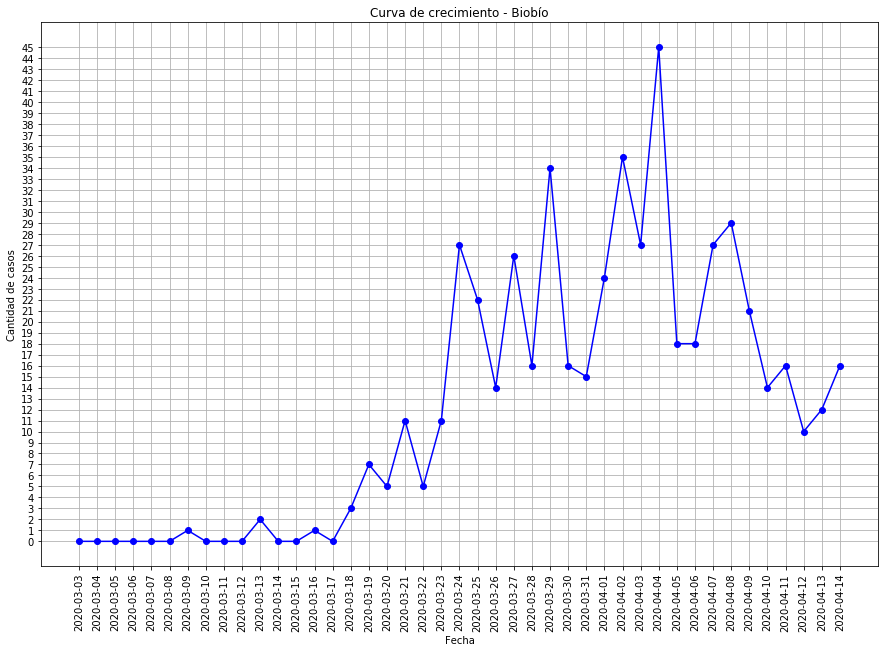

In [46]:
getGraphandList("Biobío", 1)

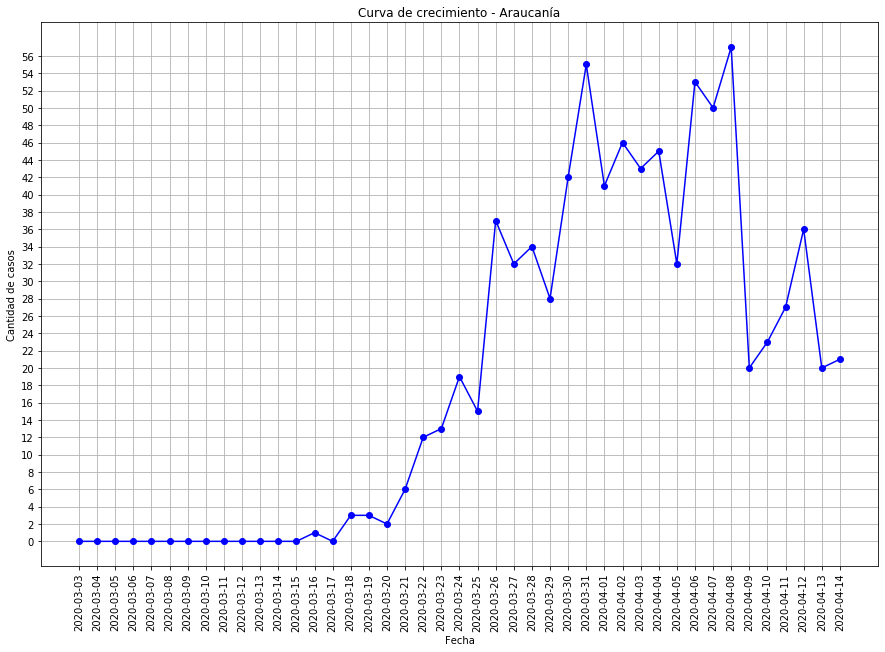

In [47]:
getGraphandList("Araucanía",2)

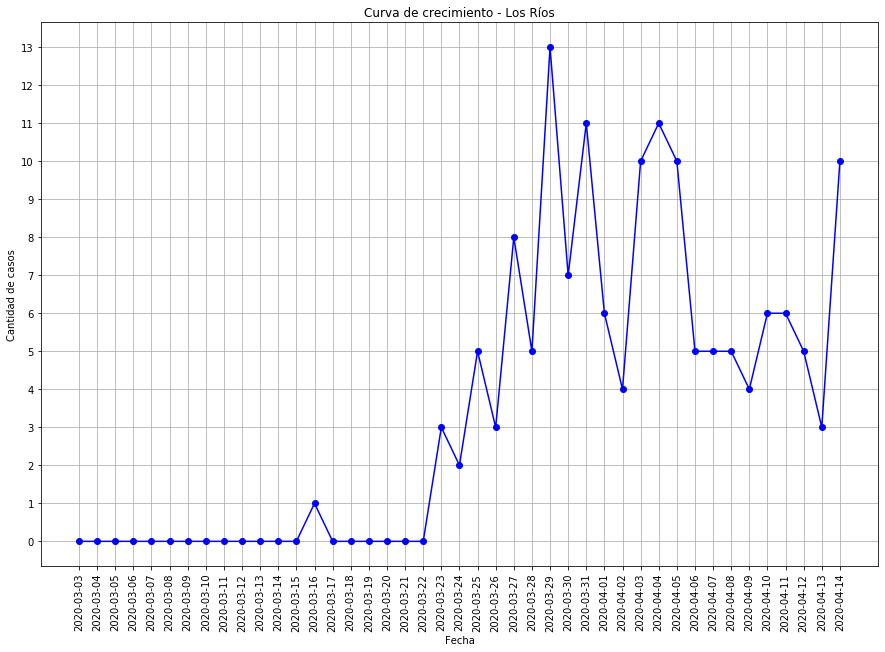

In [48]:
getGraphandList("Los Ríos", 1)

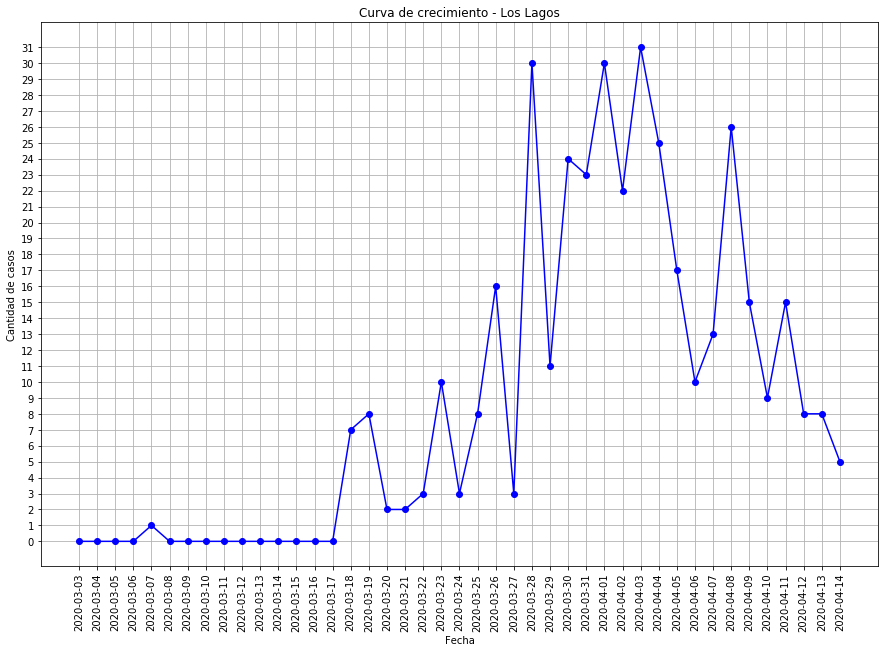

In [49]:
getGraphandList("Los Lagos", 1)

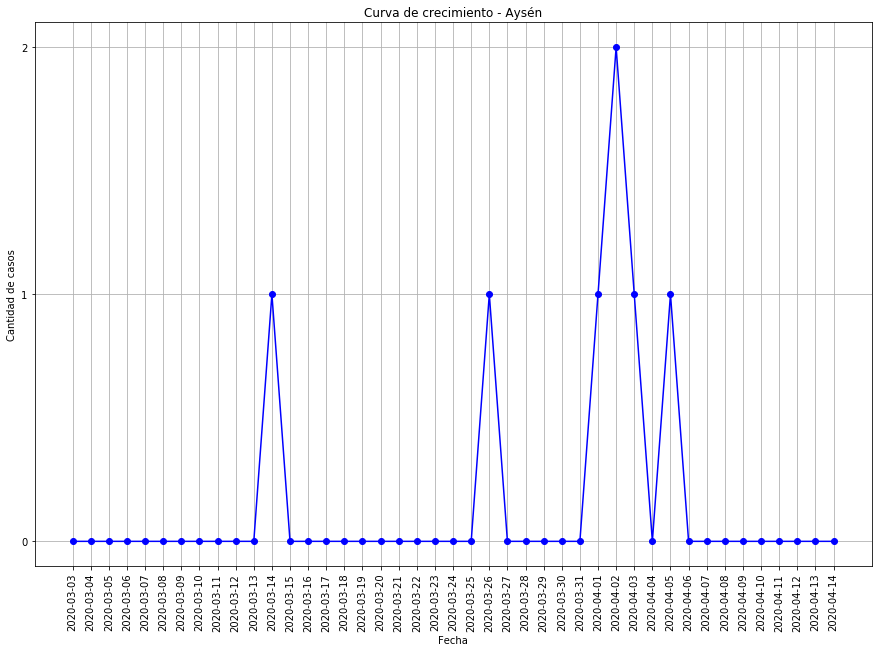

In [50]:
getGraphandList("Aysén", 1)

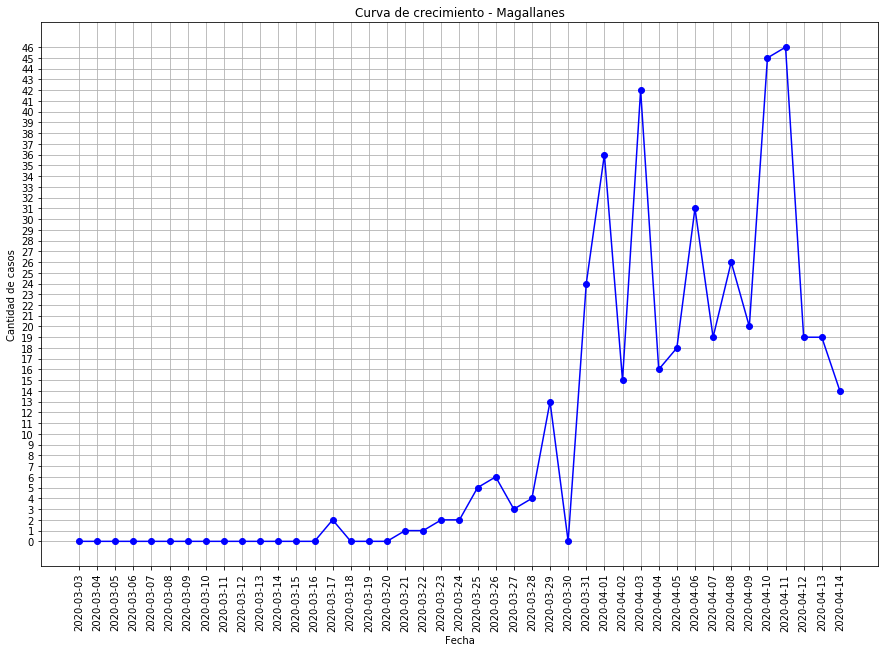

In [51]:
getGraphandList("Magallanes", 1)

In [52]:
colors = ['#f15656', '#f18e56', '#f1c956', '#bdf156', '#74f367', '#67f3b3', '#67e6f3', '#67a9f3', '#6772f3', '#9167f3', '#de67f3', '#f367c9', '#f36789', '#1c306a', "#1c6a20", "#2c6a40"]
def getGraphandListall():
    icolor = 0
    name_regiones = contagios_por_fecha_region["location"].unique()
    
    for nregion in name_regiones:
        region           = contagios_por_fecha_region.loc[contagios_por_fecha_region['location'] == nregion]
        color            = colors[icolor]
        plt.plot(region["date"],region["new_cases"], color)
        icolor += 1
        
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de nuevo casos')
    plt.title('Curva de crecimiento por región')
    plt.legend(name_regiones, loc = 'best', bbox_to_anchor=(1.0, 1.0))
    plt.show()

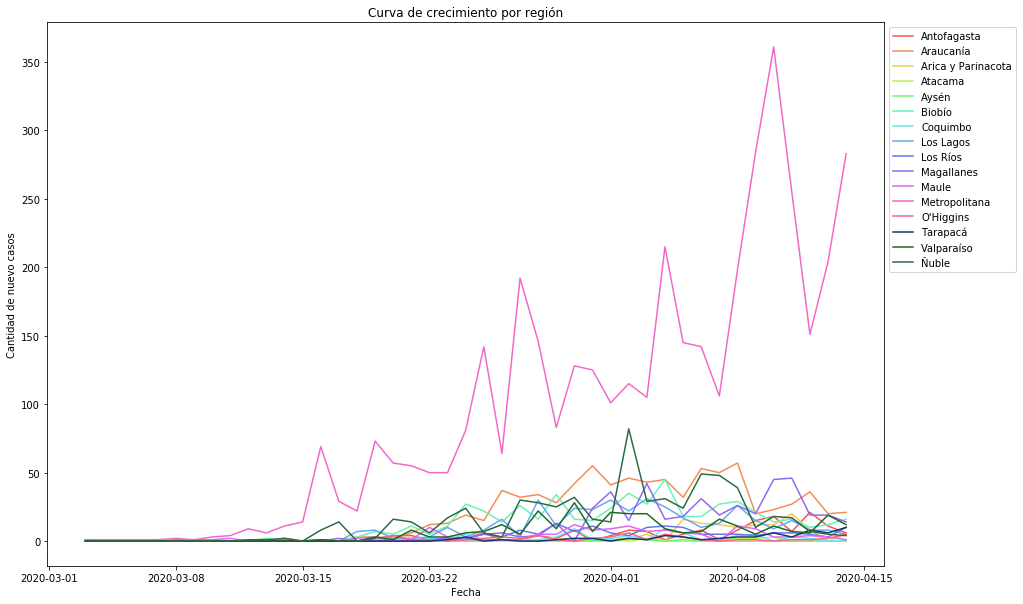

In [53]:
getGraphandListall()